In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("github  /data/houseprice2.csv")

## (Multiple Linear Regression )  الانحدار الخطي متعدد الحدود


![](https://miro.medium.com/max/1238/1*r3aOsJoXHX7uC2nxn2lygQ.png)

###   نستذكر المتغيرات  الأكثر ارتباطا بالهدف  

In [ ]:
# المتغيرات الأكثر ارتباطا بالمتغير الهدف

cormat=num_features.corr()["SalePrice"].sort_values(ascending=False)
cormat.nlargest(7)

SalePrice      1.000
OverallQual    0.817
TotalSF        0.773
GarageCars     0.681
TotalBath      0.673
GarageArea     0.651
1stFlrSF       0.597
Name: SalePrice, dtype: float64

In [ ]:
# البحث عن القيم الناقصة
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].isna().sum()

OverallQual    0
TotalSF        0
GarageCars     0
GarageArea     0
TotalBath      0
1stFlrSF       0
dtype: int64

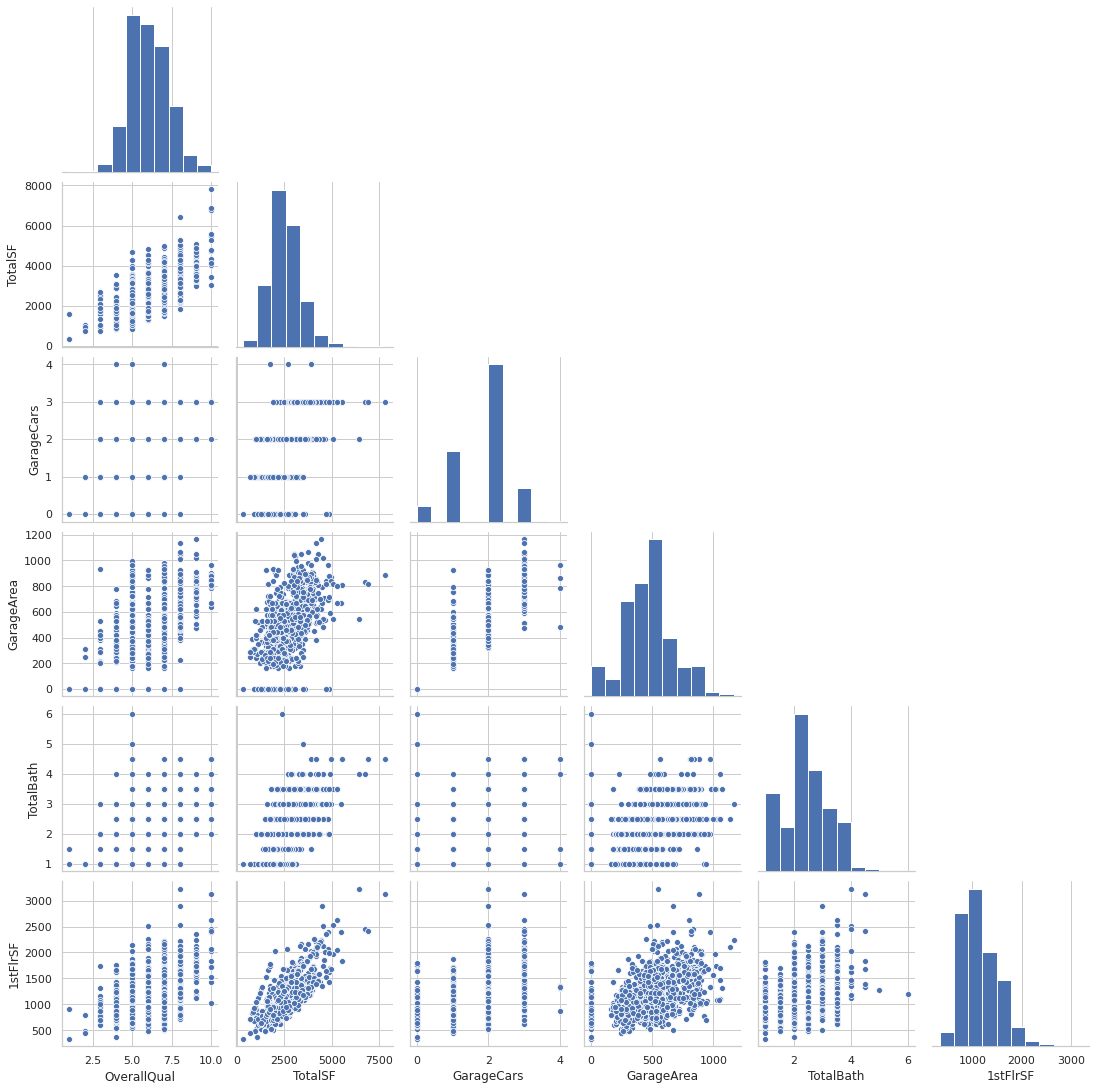

In [ ]:
 
# البحث فيما إذا كانت المتغيرات مرتبطة فيما بينها 
_= sns.pairplot(df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]] , corner=True)

In [ ]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 

In [ ]:
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].corr().T

,OverallQual,TotalSF,GarageCars,GarageArea,TotalBath,1stFlrSF
OverallQual,1.000,0.674,0.610,0.573,0.537,0.472
TotalSF,0.674,1.000,0.552,0.557,0.606,0.782
GarageCars,0.610,0.552,1.000,0.890,0.489,0.448
GarageArea,0.573,0.557,0.890,1.000,0.459,0.477
TotalBath,0.537,0.606,0.489,0.459,1.000,0.384
1stFlrSF,0.472,0.782,0.448,0.477,0.384,1.000


In [ ]:
# مساحة المرآب وارتباطها بعدد السيارات 
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].sample(4)

,OverallQual,TotalSF,GarageCars,GarageArea,TotalBath,1stFlrSF
1279,4,1826,2,528,1.0,698
878,5,2264,2,576,2.0,1155
1228,9,3404,3,1052,2.5,1702
698,5,1788,1,336,2.0,894


In [ ]:
#  التحقق من الارتباطات فيما بين الخصائص 
df[["GarageCars", "GarageArea"]].corr()

,GarageCars,GarageArea
GarageCars,1.00,0.89
GarageArea,0.89,1.00


In [ ]:
# تحديد الخصائص والهدف 
X=df[["OverallQual", "TotalSF", "GarageCars"]] 
y=df["Scaled_SalePrice"]

df_pred, coef, intercept, X_t, y_t= linearReg(X, y)

 Score  : 0.826
 MAE  : 0.311
 MSE  : 0.170
 RMSE  : 0.909


In [ ]:
f" Coefficients : {coef}"

' Coefficients : [0.3077041  0.00051619 0.28720125]'

In [ ]:
f"intercept: {intercept:.3f}"

'intercept: -3.706'

In [ ]:
pd.DataFrame(coef, X.columns, columns=['Coefficient'])

,Coefficient
OverallQual,3.077e-01
TotalSF,5.162e-04
GarageCars,2.872e-01


$$\Large \text{y_pred} = -3.706 + 0.308\color{red}*{OverallQual} + 0.516 *10^{-3}\color{red}*{TotalSF} + 0.287\color{red}*{GarageCars}  $$

In [ ]:
df_pred.head()

,Actual_P,Predicted_P
0,0.248,0.204
1,0.247,0.129
2,-0.349,-0.503
3,-0.930,-0.679
4,-1.718,-1.752


In [ ]:
pd.DataFrame({
    "Original_Price": np.expm1(scaler.inverse_transform(df_pred.Actual_P)), 
    "Predicted_Price": np.expm1(scaler.inverse_transform(df_pred.Predicted_P)),
      })

,Original_Price,Predicted_Price
0,184000.0,180807.158
1,183900.0,175431.709
2,145000.0,136380.006
3,115000.0,127134.858
4,84000.0,82878.709
...,...,...
432,126175.0,99418.020
433,180500.0,141878.267
434,120500.0,111462.117
435,158000.0,124099.512


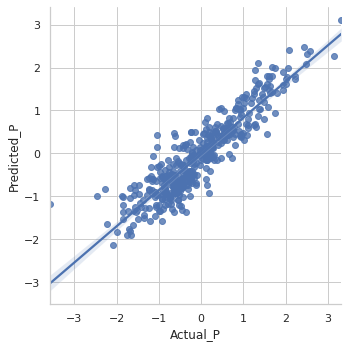

In [ ]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.lmplot("Actual_P",  "Predicted_P", data=df_pred)

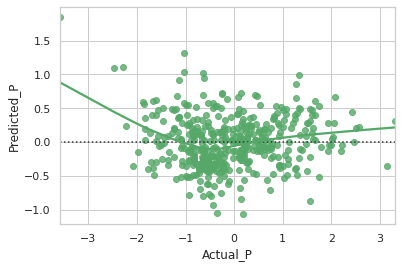

In [ ]:
# نخطيط البقايا
_=sns.residplot(df_pred.Actual_P, df_pred.Predicted_P, lowess=True, color="g")

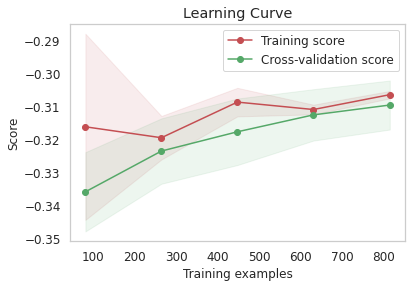

In [ ]:
# تخطيط التعلم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lreg, X_t, y_t, scoring="neg_mean_absolute_error")